**<h3>Python Script Imports</h3>**

In [3]:
import os
import sys
#Path Setup
python_scripts_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/python-scripts"
housing_path = r"E:/Future Plans/Post-Graduation-Projects/Hands-on Machine Learning/first-project/datasets/housing.csv"

#Path initialization so that Python can see where our script lies.
script_dir = os.path.abspath(python_scripts_path) 
sys.path.append(script_dir)

#Import Python functions from the paths
from load_housing_data import load_housing_data
from split_train_test import split_train_test

**<h3>What is Test Set all about?</h3>**

- Pick a few random instance (districts) from the entire dataset of districts
  + E.g. randomly 20 students out of 100 students.
- Set it aside (don't touch it)
- When done training the ML model, use this set to check if the model performs well.

**<h3>Test set generation (with 20% of the random instances from the data set).</h3>**
- E.g. Of all 10 students (A, B, C, D, E, F, G, H, I, J, K), randomly pick 2 of them (e..g B+K, F+G)
- Or in this case, it's to pick 4128 random districts from the total of 16512 training districts.


In [4]:
housing = load_housing_data(housing_path)
train_set, test_set = split_train_test(housing, 0.2) #0.2 = 20% of all housing data (instances)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


**<h3>Problem with random test set generation:</h3>**
- To test the AI performance, first, we extract A, B, C as test suite 1.
- After running test suite 1, we generate a different test suite (2), with students D, E, F.
- See the problem? We are slowly letting the ML model know almost all of the 10 students (A, B, C, D, E, F). This is not good, because: 
- ML is overfitting (learn A, B, C, D, E, F) by heart (e.g. these students tend to score between 7 and 8 points). However, in reality, they might score 5-6 points, or 8-9 points.


**<h3>Solutions:</h3>**

**<h5>Method 1: Use a fixed seed when using random generator (np.random.seed)</h5>**
- Example: `np.random.seed(42)` By setting it to 42, the same test set is always generated for each future training turns.
- Fact: `42` is a number considered as: "The answer to everything". https://en.wikipedia.org/wiki/42_(number)#:~:text=The%20number%2042%20is%2C%20in,knows%20what%20the%20question%20is.

**<h5>Method 2: Save the test after generating from the first time</h5>**

**<h5>Method 3: Use the hash of each row's identifier.Use a unique identifier, for each instance (row in dataset)</h3>**
  - **Step 1**: In the dataset (table), create an **identifier column** (with all unique values). Example: 
<p align="center">
	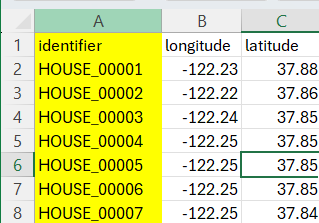 
</p>
 
  - **Step 2**: For each value in identifier column, calculate its hash. Example with identifier = `HOUSE_00001`:
<p align="center">
	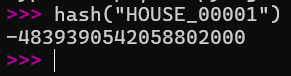 
</p>

  - **Step 3**: Take the last byte of the hash, for example, `-4839390542058802000` > 0.

  - **Step 4**: If the byte is less than 51 (20% of 256 bytes) -> put that row/instance into the test set.
  
**<h5>Notes</h5>**
- Besides the **identifier column**, we can **combine multiple columns** in the table to tell each row/instance apart from each other. Example:
  + Normally, we can use the `identifier` column (see image above), or 
  + However, we can combine Full name + Address + ID of a student as they tend to be permanent.
- This is similar to Primary Key (`identifier`) and Composite Key  (`FullName + Address + ID`) in database.
      

  

**<h3>Functions to generate test sets</h3>** 
**<h5>Function 1: `test_set_check` and `split_train_test` combo</h5>** 
<p align="center">
	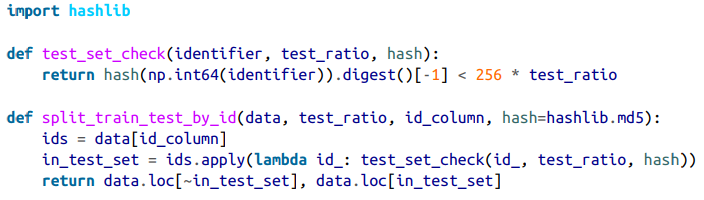 
</p>

- **Notes**
  + This snippet is already available in the `split_train_test_by_id.py` file, within the `python_scripts_path`.
  + When using this snippet, be sure that the dataset already contains an identification column (e.g. id).

<p align="center">
	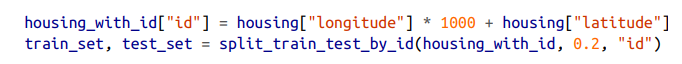 
</p>

**<h5>Function 2: `train_test_split` from ScikitLearn</h5>** 
<p align="center">
	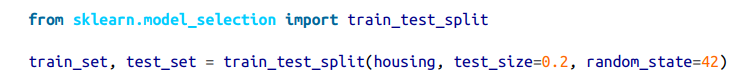 
</p>


**<h3>Issues when sampling</h3>** 
- When data is large enough > above sampling methods work.
- But if data is small > sampling bias is super high.

**<h5>Example 1</h5>** 
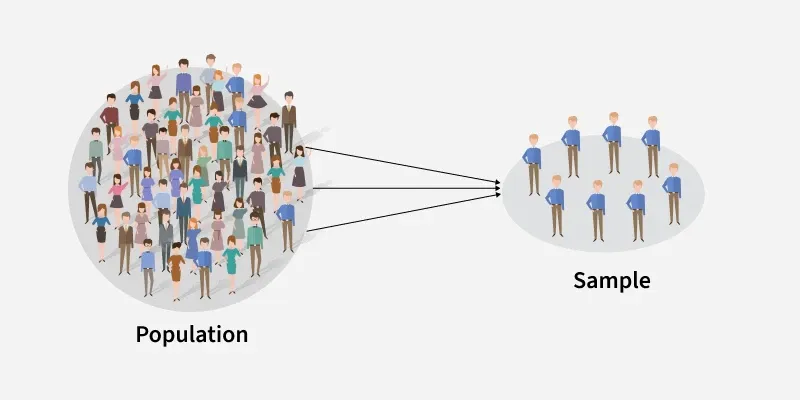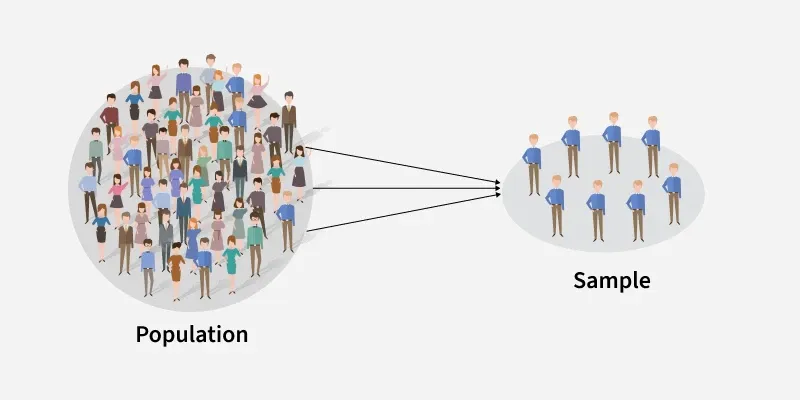

- Imagine you're researching **phone use habits of citizens** within Ho Chi Minh City. Given the above image as an example, we have 9.8 million people (the population), and these following types of people

| Category | Image 
| :------- | :------:
| Adults (men in blue shirt)     | 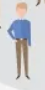|
| Elderly (men in brown shirt):   | 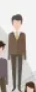|
| Children (women in pink shirt + black dress)| 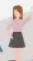|


- The thing is, you **only pick Adults** for your phone use habit reseach, but **not the Elderly + Children**. Basically, you're preferring Adults (biased) over the rest, and this is called Sampling Bias.

**<h5>Example 2 (possibly deprecated)</h5>** 

Imagine you're surveying 100 workers, about how spend their free time after work. You focus on 3 types of workers:

- Office workers, who work at cooperation (50)
- Free-lance workers, who primarily work from home (20)
- Hybrid-workers, who sometimes reside at office or workplace. (10)


Because you focus mostly on office workers (as shown by the number 50), it's likely that they spend their free time watching TikTok, social media as they're burnt out after a long workday.

So you conclude: workers tend to surf TikTok, social media after work.

However, in reality, besides surfing TikTok, 30% of the workers learn a new skill, and 50% of them spend time with their beloved ones.

Why does this happen? Because you prefer office workers to free-lance workers + hybrid workers, and the number of freelance + hybrid workers are even more than that (20 + 10 = 30).